# Predizione del salario di un dipendente a seconda delle sue caratteristiche
### Progetto di esame per il corso di Programmazione di Applicazioni Data Intensive - 2022/2023
Babboni Luca \
luca.babboni2@studio.unibo.it \
Mat: 0000971126


## Import delle librerie principali

Importiamo le librerie di uso comune che ci serviranno durante l'analisi del dataset 

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [90]:
#per evitare i warning 
from warnings import filterwarnings
filterwarnings('ignore')

## Importazione dei dati
Il dataset utilizzato per questo progetto si chiama [Salary_Data](https://www.kaggle.com/datasets/mohithsairamreddy/salary-data) ed é disponibile su [Kaggle](https://www.kaggle.com).


In [91]:
#importa os per poter leggere i file
import os.path as os
import kaggle

In [92]:
if not os.exists("Salary_Data.csv"):
    kaggle.api.authenticate()
    kaggle.api.dataset_download_files(
        'mohithsairamreddy/salary-data', path='.', unzip=True)

In [93]:
#import del dataset
dataset = pd.read_csv('Salary_Data.csv')
dataset.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


### Descrizione del dataset
Il dataset contiene un totale di 6704 righe dati e ha a disposizione 6 colonne. Il dataset include sei variabili: età, esperienza, ruolo lavorativo, livello di istruzione e salario.

### Descrizione delle colonne

- `Age`: Etá dell'impiegato. 
- `Gender`: Il sesso dell'impiegato. 
- `Education Level`: Il ivello d'istruzione dell'impiegato. 
- `Job Title`: Ruolo di impiego. 
- `Years of Experience`: Anni di esperienza. 
- `Salary`: Salario mensile (Variabile target)

### Obbiettivo del progetto
L'obbiettivo di questo progetto sará predirre il salario (colonna `Salary`) di un lavoratore a seconda delle sue caratteristiche. La variabile `Salary` é un valore numerico e non ha vincoli di dimensione. Le altre variabili sono feature e saranno utilizzate per predirre la variabile target


### Analisi del dataset
Andiamo a visualizzare alcune informazioni sul dataset, in modo da capire come é strutturato. \
Tramite il metodo `.dtypes` otteniamo informazioni in merito alle tipologie dei dati. 

In [94]:
dataset.dtypes

Age                    float64
Gender                  object
Education Level         object
Job Title               object
Years of Experience    float64
Salary                 float64
dtype: object

Ogni colonna risulta giá mantenere al suo interno il giusto tipo di dato.  

Proseguiamo utilizzando il metodo `.describe()` che ci permette di avere un'idea della distribuzione delle variabili numeriche all'interno del dataset

In [95]:
dataset.describe()

,Age,Years of Experience,Salary
count,6702.000000,6701.000000,6699.000000
mean,33.620859,8.094687,115326.964771
std,7.614633,6.059003,52786.183911
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


Controlliamo quindi se all'interno del dataset sono presenti valori nulli

In [96]:
dataset.isnull().sum()

Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64

Visto che i valori nulli rappresentano una percentuale trascurabile dei valori contenuti all'interno del dataset procedo ad eliminarli

In [97]:
tot_len = len(dataset.index)
dataset.dropna(inplace=True)
print("Numero di righe scartate: ", tot_len - len(dataset.index), "il che rappresenta il ", round((tot_len - len(dataset.index))/tot_len*100, 2), "% del dataset iniziale")

Numero di righe scartate:  6 il che rappresenta il  0.09 % del dataset iniziale


Proseguo controllando il contenuto della colonna `Gender`. 

In [98]:
dataset["Gender"].unique()

array(['Male', 'Female', 'Other'], dtype=object)

Come si puó notare all'interno della colonna Gender sono presenti alcuni valori `Other`. Procediamo quindi con il rimuoverli. 

In [99]:
removed_data = dataset['Gender'].value_counts()["Other"]
dataset = dataset[dataset['Gender'] != 'Other']
print("Sono state rimosse", removed_data, "righe")

Sono state rimosse 14 righe


Ora cambiamo il tipo della colonna in categorica

In [100]:
mem_usage_gender = dataset["Gender"].memory_usage(deep=True)
dataset["Gender"] = dataset['Gender'].astype("category")
mem_resp = mem_usage_gender - dataset["Gender"].memory_usage(deep=True)
print("Sono stati risparmiati", mem_resp, "Bytes. Che rapprensantano il ", mem_resp/mem_usage_gender*100, "% della memoria utilizzato in precedenza") 

Sono stati risparmiati 406834 Bytes. Che rapprensantano il  87.07509492275621 % della memoria utilizzato in precedenza


Analizziamo ora la colonna che rappresenta i possibili titoli di studio

In [101]:
dataset["Education Level"].unique()

array(["Bachelor's", "Master's", 'PhD', "Bachelor's Degree",
       "Master's Degree", 'High School', 'phD'], dtype=object)

É subito evidente che alcuni titoli di studio sono ripetuti, come ad esempio "`PhD`" e "`phD`" oppure "`Master's Degree`" e "`Master's`". 

Procediamo quindi ad uniformare i titoli di studio e a rendere la serie categorica

In [102]:
dataset['Education Level'].replace({"Bachelor's Degree": "Bachelor",
                                    "Bachelor's": "Bachelor", 
                                    "Master's Degree": "Master",
                                    "Master's": "Master", 
                                    "phD": "PhD", 
                                    }, inplace=True)

In [103]:
mem_usage_ed = dataset["Education Level"].memory_usage(deep=True)
dataset["Education Level"] = dataset['Education Level'].astype("category")
mem_resp = mem_usage_gender - dataset["Education Level"].memory_usage(deep=True)
print("Sono stati risparmiati", mem_resp, "Bytes. Che rapprensantano il ", mem_resp/mem_usage_gender*100, "% della memoria iniziale") 

Sono stati risparmiati 406638 Bytes. Che rapprensantano il  87.0331448433507 % della memoria iniziale


In [104]:
dataset["Education Level"].unique()

['Bachelor', 'Master', 'PhD', 'High School']
Categories (4, object): ['Bachelor', 'High School', 'Master', 'PhD']

Analizziamo il contenuto della colonna `Job Title`

In [105]:
dataset["Job Title"].value_counts() 

Job Title
Software Engineer             518
Data Scientist                453
Software Engineer Manager     376
Data Analyst                  363
Senior Project Engineer       316
                             ... 
Account Manager                 1
Help Desk Analyst               1
Senior Training Specialist      1
Junior Web Designer             1
Software Project Manager        1
Name: count, Length: 191, dtype: int64

Come si puó vedere esistono alcuni lavori che appaiono molto raramente. Fissiamo una soglia a un minimo di 10 occorrenze ed eliminiamo quelli che appaiono piú raramente

In [106]:
conteggi = dataset["Job Title"].value_counts()
soglia = 5
filtro = conteggi <= soglia
valori_da_elim = conteggi[filtro].index.tolist()
dataset = dataset[~dataset['Job Title'].isin(valori_da_elim)]
print("Sono state rimosse", len(valori_da_elim), "righe")

Sono state rimosse 125 righe


## Analisi esplorativa
Nella sezione seguente si andrá ad analizzare le relazioni tra le feature e la variabile target

### Relazione tra lo stipendio e genere

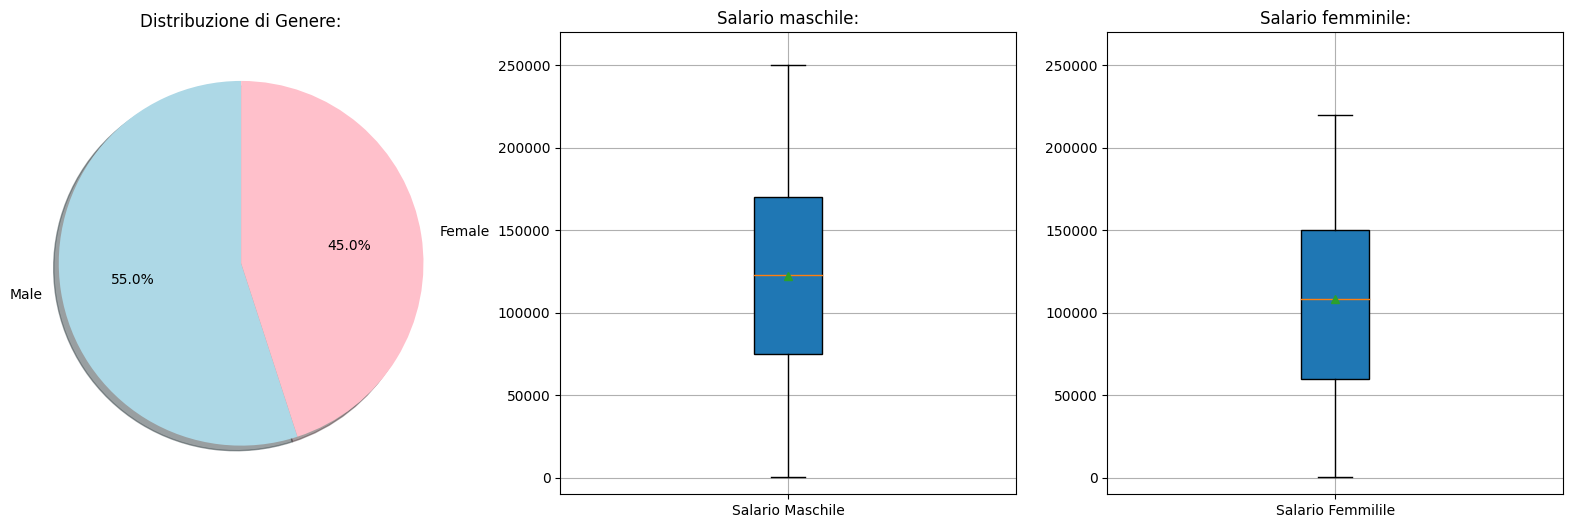

In [107]:
result_counts = dataset['Gender'].value_counts()
gener_colors = {"Male" : "lightblue", "Female" : "pink"}

plt.figure(figsize=(20, 6))
plt.subplot(1, 3, 1).pie(result_counts, labels = result_counts.index, colors = dataset["Gender"].map(gener_colors), shadow=True, startangle=90, autopct='%1.1f%%')
plt.title('Distribuzione di Genere:')


plt.subplot(1, 3, 2).boxplot(dataset[dataset["Gender"] == "Male"]['Salary'] , patch_artist=True, labels=['Salario Maschile'], showmeans=True )
plt.title('Salario maschile:')
plt.ylim(-10000 , 270000)
plt.grid()
plt.subplot(1, 3, 3).boxplot(dataset[dataset["Gender"] == "Female"]['Salary'], patch_artist=True, labels=['Salario Femmilile'], showmeans=True)
plt.ylim(-10000, 270000)
plt.title('Salario femminile:')
plt.grid()

Come si puó notare dal primo grafico la popolazione all'interno del dataset é distribuita in maniera abbastanza omogenea, con una leggera sproporzione verso il genere maschile.

Il secondo e terzo grafico ci indicano la distribuzione di stipendio. Notiamo che il valore dello stiopendio medio femminile é leggermente inferiore a quello maschile. 

Procediamo analizzando piú nel dettaglio lo stipendio medio percepito dai due generi.

Text(0.5, 1.0, 'Confronto Stipendio Medio per Genere')

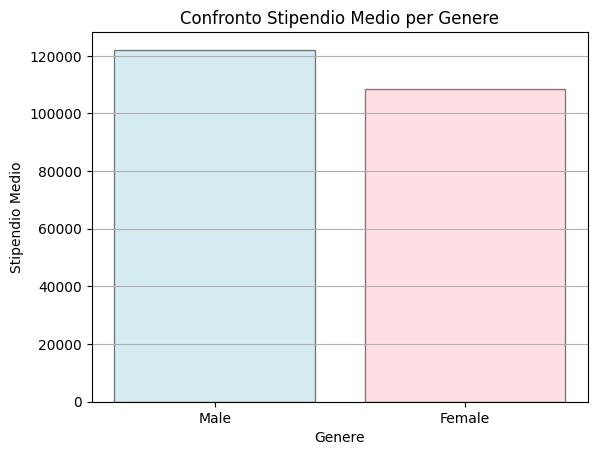

In [108]:
categorie = ['Male', 'Female']
color = ['lightblue', 'pink']
posizione = range(len(categorie))

plt.bar(posizione, [dataset[dataset['Gender'] == 'Male']['Salary'].mean(),
                    dataset[dataset['Gender'] == 'Female']['Salary'].mean()],
                    align='center', alpha=0.5, color=color, edgecolor='black')

plt.xticks(posizione, categorie)
plt.grid(axis='y')
plt.xlabel('Genere')
plt.ylabel('Stipendio Medio')
plt.title('Confronto Stipendio Medio per Genere')

Il grafico mostra che esiste una differenza tra lo stipendio medio maschile e femminile. 

### Relazione tra stipendio e anni di esperienza

Text(0, 0.5, 'Conteggio')

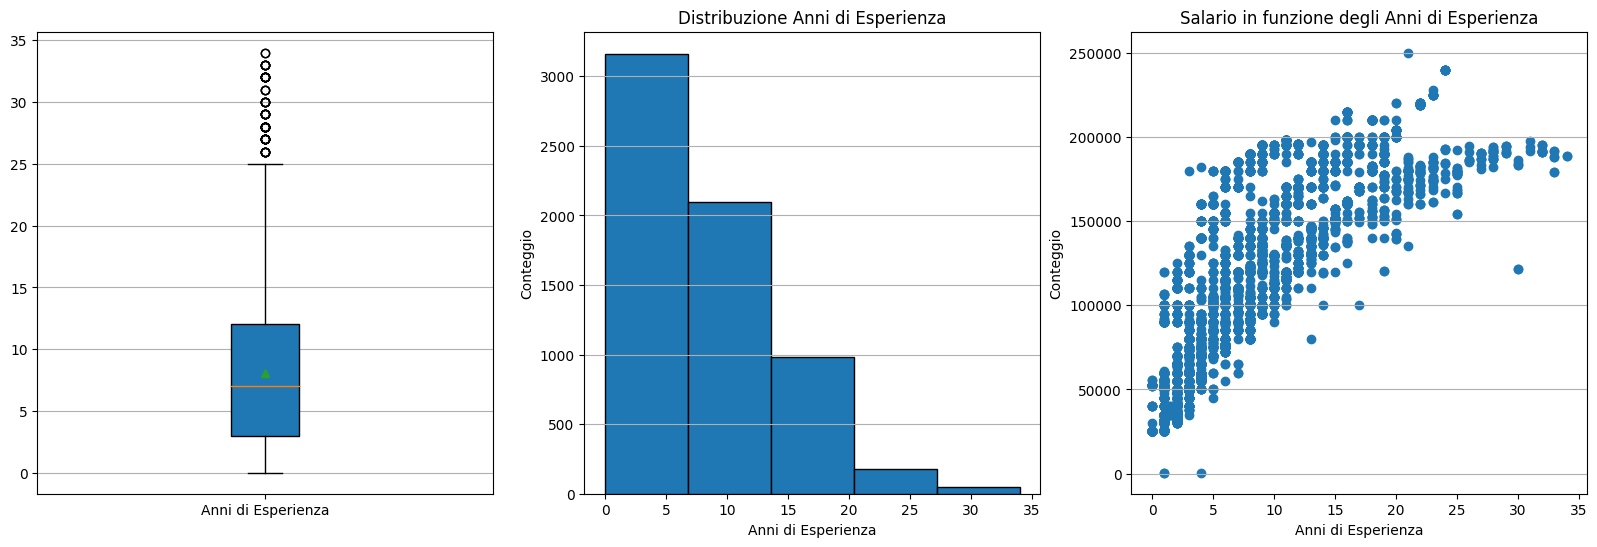

In [109]:
plt.figure(figsize=(20, 6))

plt.subplot(1,3,1).boxplot(dataset['Years of Experience'], showmeans=True, patch_artist=True, labels=['Anni di Esperienza'])
grid = plt.grid(axis='y')

plt.subplot(1,3,2).hist(dataset['Years of Experience'], bins=5, edgecolor='black')
plt.title('Distribuzione Anni di Esperienza')
plt.xlabel('Anni di Esperienza')
plt.grid(axis='y')
plt.ylabel('Conteggio')

plt.subplot(1,3,3).scatter(dataset['Years of Experience'], dataset["Salary"])
plt.title('Salario in funzione degli Anni di Esperienza')
plt.xlabel('Anni di Esperienza')
plt.grid(axis='y')
plt.ylabel('Conteggio')

Tramite i primi 2 grafici possiamo ossevare come la maggior parte del campione di lavoratori analizzato ha meno di 15 anni di esperienza.  
Dal terzo grafico possiamo notare come il salario cresca regolarmente in funzione degli anni di esperienza.

### Relazione tra etá e stipendio

Text(0.5, 1.0, 'Mean Salary by Age')

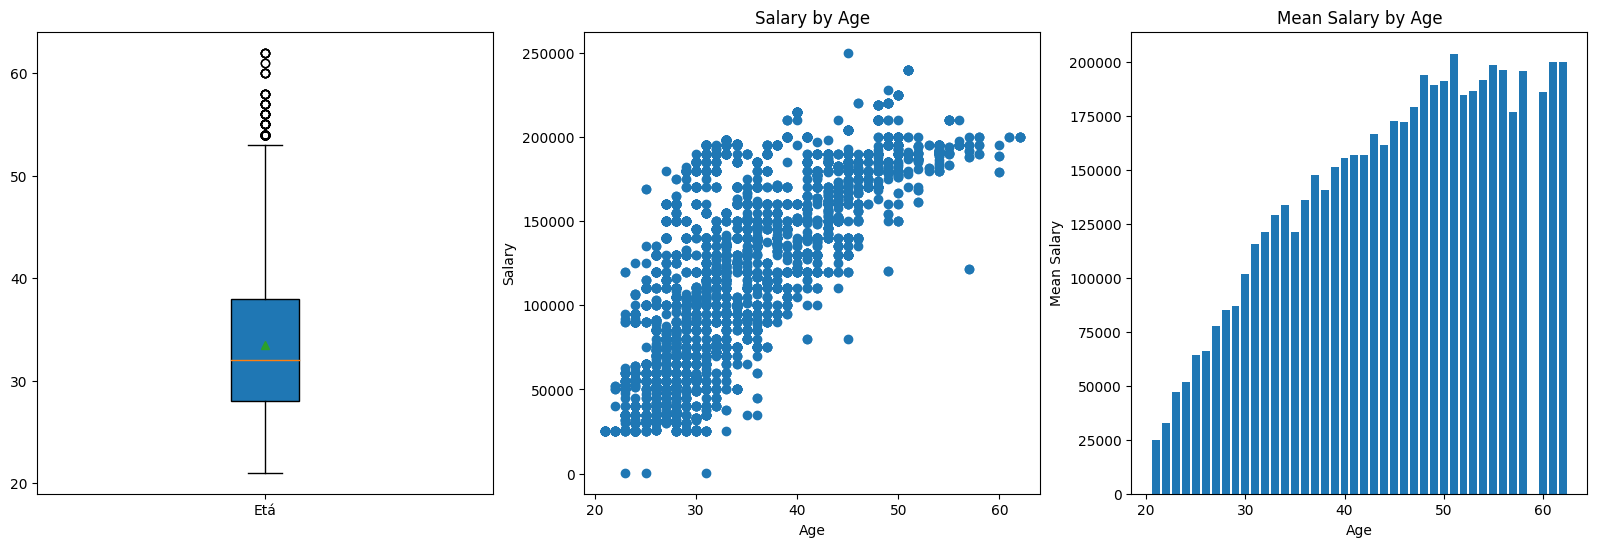

In [110]:
plt.figure(figsize=(20, 6))

plt.subplot(1,3,1).boxplot(dataset['Age'], showmeans=True, patch_artist=True, labels=['Etá'])

plt.subplot(1,3,2).scatter(dataset["Age"], dataset["Salary"])
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Salary by Age')

age_salary_mean = dataset.groupby('Age')['Salary'].mean()
plt.subplot(1,3,3).bar(age_salary_mean.index, age_salary_mean.values)
plt.xlabel('Age')
plt.ylabel('Mean Salary')
plt.title('Mean Salary by Age')

Dal primo grafico possiamo notare che la maggior parte dei lavoratori facente parte del campione analizzato ha meno di 40 anni. 

Il secondo e il terzo grafico invece indicano una relazione molto stretta tra etá e stipendio. Generalmente, all'aumentare del primo si riscontra un incremento nel secondo.

### Relazione tra livello di istruzione e stipendio

Andiamo a studiare come il livello di istruzione di un impiegato puó influire nel suo salario 

Text(0, 0.5, 'Stipendio')

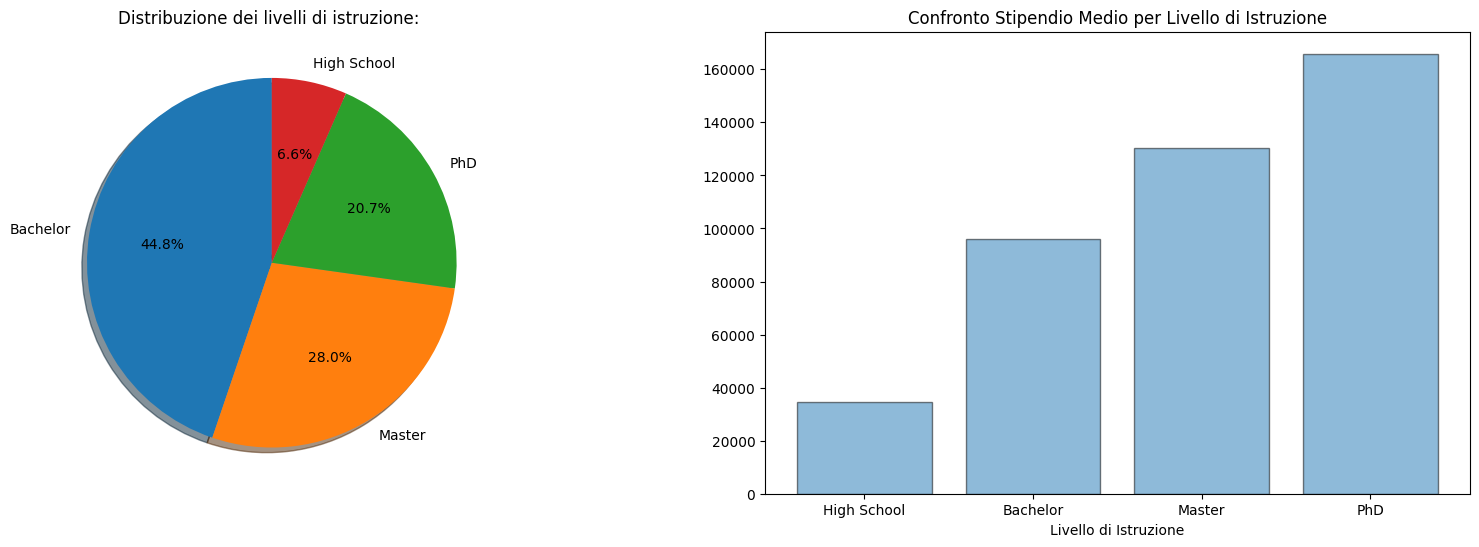

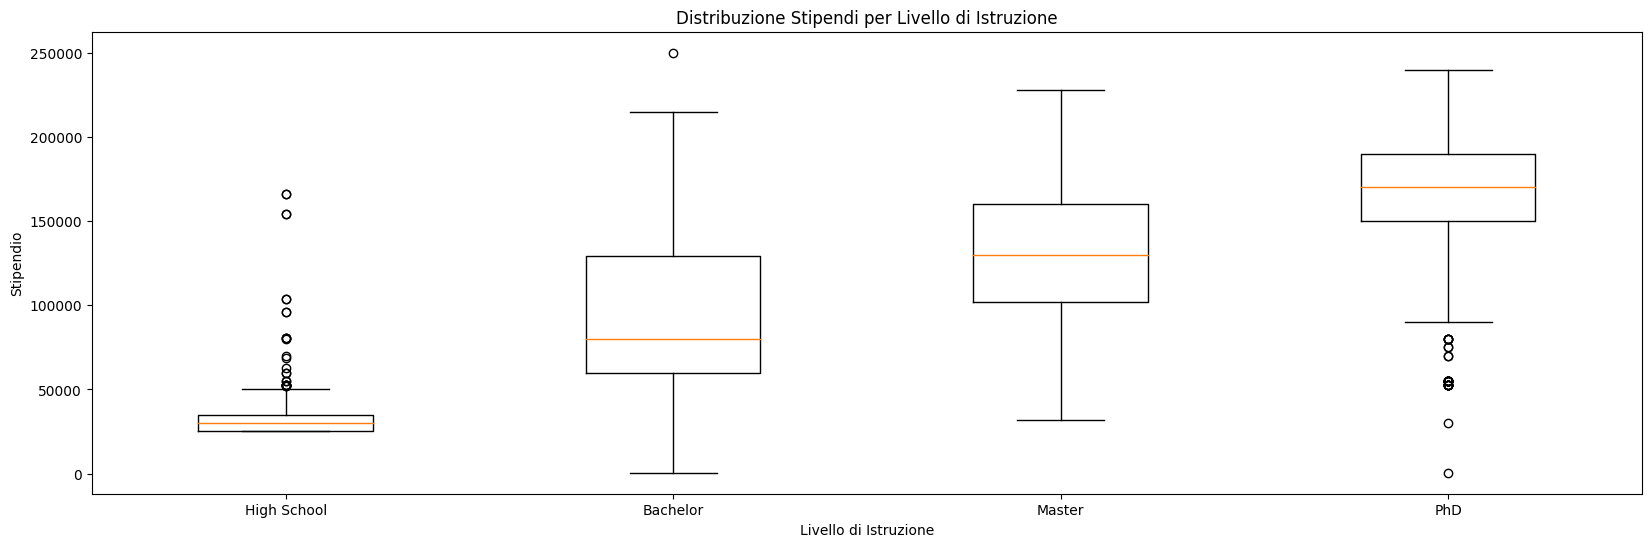

In [111]:
mean_salary_by_ed = [dataset[dataset['Education Level'] == 'High School']['Salary'].mean(),
                    dataset[dataset['Education Level'] == 'Bachelor']['Salary'].mean(), 
                    dataset[dataset['Education Level'] == 'Master']['Salary'].mean(),
                    dataset[dataset['Education Level'] == 'PhD']['Salary'].mean()]
categorie = [ 'High School', 'Bachelor', 'Master', 'PhD']
posizione = range(len(categorie))


plt.figure(figsize=(20, 6))

plt.subplot(1,2,1).pie(dataset["Education Level"].value_counts(),labels = dataset["Education Level"].value_counts().index , shadow=True, startangle=90, autopct='%1.1f%%')
plt.title('Distribuzione dei livelli di istruzione: ')

plt.subplot(1,2,2).bar(posizione, mean_salary_by_ed, align='center', alpha=0.5, edgecolor='black')
plt.xticks(posizione, categorie)
plt.xlabel('Livello di Istruzione')
plt.title('Confronto Stipendio Medio per Livello di Istruzione')

plt.figure(figsize=(20, 6))
plt.boxplot([dataset[dataset["Education Level"] == "High School"]['Salary'],
            dataset[dataset["Education Level"] == "Bachelor"]['Salary'],
            dataset[dataset["Education Level"] == "Master"]['Salary'],
            dataset[dataset["Education Level"] == "PhD"]['Salary']])
plt.xticks(range(1, len(categorie) + 1), categorie)
plt.title('Distribuzione Stipendi per Livello di Istruzione')
plt.xlabel('Livello di Istruzione')
plt.ylabel('Stipendio')

Seppure le classi risultino essere sbilanciate ed esistano aluni valori outliers é evidente un aumento di stipendo in funzione del titolo di studio. \
Una possibile spiegazione del fenomeno puó essere che un grado di istruzione di piú alto permette di accedere a posizioni lavorative meglio retribuite. 

### Relazione tra posizione lavorativa e stipendio 

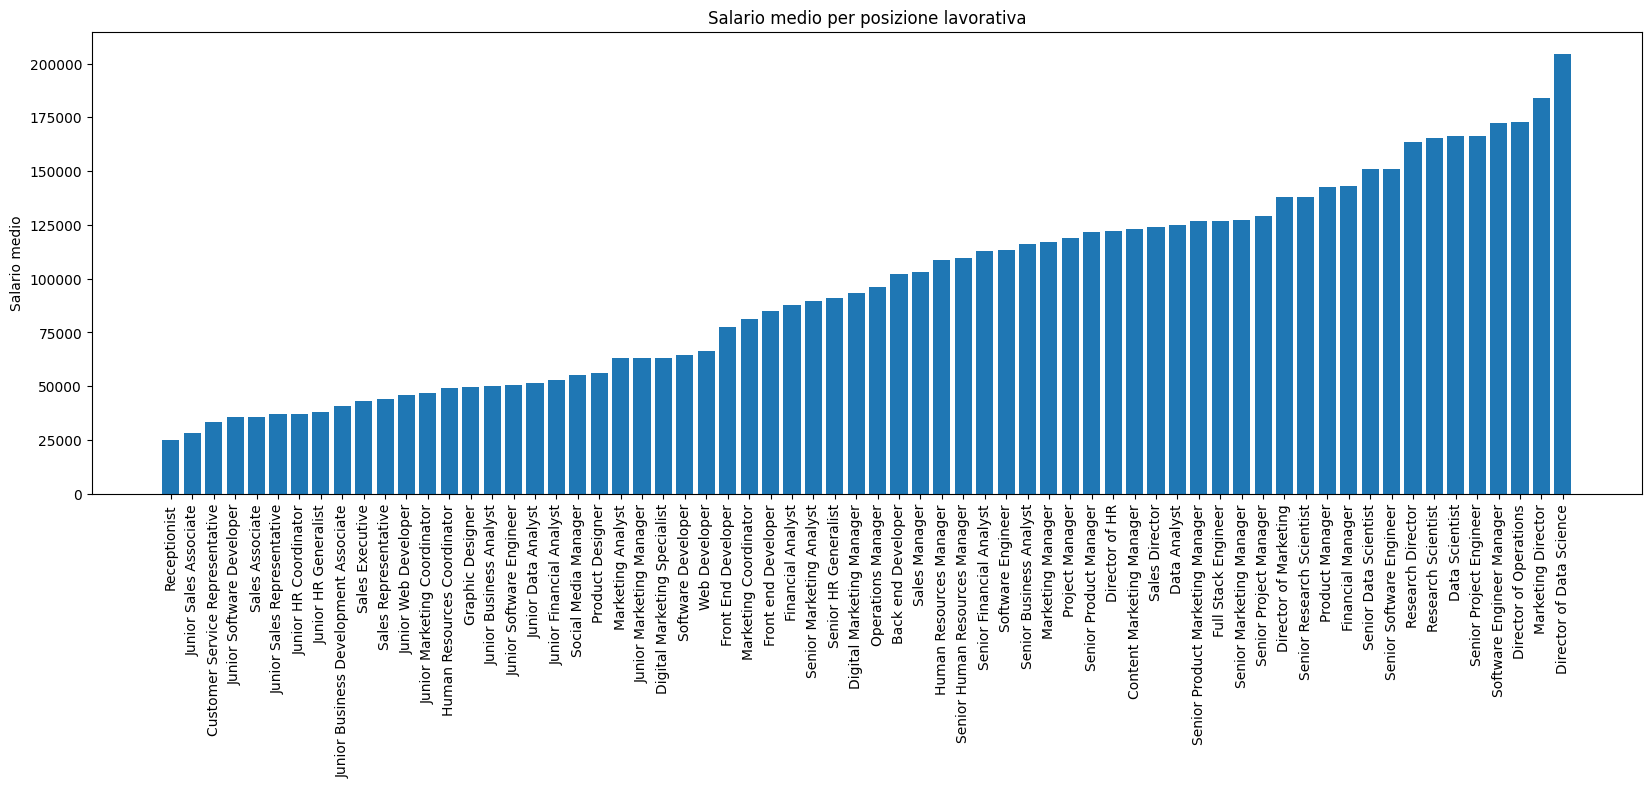

In [112]:
mean_salary_by_job = dataset.groupby('Job Title')['Salary'].mean()
mean_salary_by_job = mean_salary_by_job.sort_values(ascending=True)

plt.figure(figsize=(20, 6))  
plt.bar(mean_salary_by_job.index, mean_salary_by_job.values)  
plt.ylabel('Salario medio')  
plt.title('Salario medio per posizione lavorativa')  
plt.xticks(rotation=90) 
plt.show()  


Il grafico dimostra come la retribuizione media di un dipendente é strettamente legata al lavoro svolto.

### Risultati dell'indagine esplorativa

Dall'analisi effettutata é risultato che lo stipendio é legato a ai fattori:
- Etá
- Genere
- Posizione lavorativa
- Anni di esperienza
- Titolo di studio 

Tramite queste feature andremmo a costruire dei modelli di previsione.

## Parte 3: Addestramento ed analisi dei modelli

Andiamo ora ad addestrare dei modelli di predizione che utilizzano i dati precedentemente descritti. \
Prima andremo a testare diversi metodi di ricorsione, per poi concentrarci su quello che restituisce i risultati migliori.  
I modelli che andremo a testare saranno: 
- Regressione Lineare
- Regressione Ridge
- Regressione Lasso
- Regressione Elastic Net
- Decision Tree Regression

Andiamo quindi a definire una funzione che ci permetterá di valutare l'accuratezza di ogni modello

In [113]:
from sklearn.metrics import mean_squared_error, r2_score

def relative_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true))


def print_eval(X, y, model):
    preds = model.predict(X)
    mse = mean_squared_error(y, preds)
    re = relative_error(y, preds)
    r2 = r2_score(y, preds)
    print(f"   Mean squared error: {mse:.5}")
    print(f"       Relative error: {re:.5%}")
    print(f"R-squared coefficient: {r2:.5}")

Procediamo dividendo il dataset in 2 parti, utilizzate per addestrare e validare i modelli.

In [114]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(dataset, test_size=0.2, random_state=42)

x_train = train_set.drop(columns=["Salary"])
y_train = train_set["Salary"]
x_test = test_set.drop(columns=["Salary"])
y_test = test_set["Salary"]

All'interno del dataset sono presenti alcune colonne categoriche, ed i dati numerici non sono standardizzati. Tramite `preprocessor` potremo effettuare un preprocessing differenziato per tipologia di colonna.

In [115]:
#librerie necessarie 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [116]:
categorical_vars = ['Gender', 'Education Level', 'Job Title']
numeric_vars = ['Age', 'Years of Experience']


In [117]:
preprocessor = ColumnTransformer([
    # nome           filtro            colonne
    ( "numeric"    , StandardScaler(), numeric_vars),
    ( "categorical", OneHotEncoder() , categorical_vars)
])

#### Regressione Lineare
Andiamo a creare una pipeline per il training di un modello ottenuto tramite regressione lineare,

Iniziamo testando la ricorsione lineare di grado 1.

In [118]:
#import necessari
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

In [119]:
lin_reg = Pipeline([
    ("preproc", preprocessor),
    ("regr"   , LinearRegression())
])

lin_reg.fit(x_train, y_train)
print_eval(x_train, y_train, lin_reg)


   Mean squared error: 4.5642e+08
       Relative error: 19.77186%
R-squared coefficient: 0.8378


Otteniamo da subito un buon risultato. Il modello sembra promettente proviamo ad eseguire una gridsearch in modo da trovare gli iperparametri migliori.

In [120]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV

In [121]:
lin_reg_gs = Pipeline([
    ("preproc", ColumnTransformer([
        ('poly', PolynomialFeatures(include_bias=False), numeric_vars),
        ( "numeric"    , StandardScaler(), numeric_vars),
        ( "categorical", OneHotEncoder() , categorical_vars)
    ])),
    ("regr", LinearRegression())
])

grid = {
    "preproc__numeric": ["passthrough", StandardScaler()],
    "preproc__poly__degree": np.linspace(1, 5, 5).astype(int),
    "preproc__categorical__drop": [None, "first"]
}

#include
gs_linreg = GridSearchCV(lin_reg_gs, grid)
gs_linreg.fit(x_train, y_train)    

GridSearchCV(estimator=Pipeline(steps=[('preproc',
                                        ColumnTransformer(transformers=[('poly',
                                                                         PolynomialFeatures(include_bias=False),
                                                                         ['Age',
                                                                          'Years '
                                                                          'of '
                                                                          'Experience']),
                                                                        ('numeric',
                                                                         StandardScaler(),
                                                                         ['Age',
                                                                          'Years '
                                                                          'of '
                                                                          'Experience']),
                                                                        ('categorical',
                                                                         OneHotEncoder(),
                                                                         ['Gender',
                                                                          'Education '
                                                                          'Level',
                                                                          'Job '
                                                                          'Title'])])),
                                       ('regr', LinearRegression())]),
             param_grid={'preproc__categorical__drop': [None, 'first'],
                         'preproc__numeric': ['passthrough', StandardScaler()],
                         'preproc__poly__degree': array([1, 2, 3, 4, 5])})

In [122]:
print("Errore sul training set:")
print_eval(x_train, y_train, gs_linreg)
print("\n")
print("Errore sul validation set:")
print_eval(x_test, y_test, gs_linreg)

Errore sul training set:
   Mean squared error: 3.3052e+08
       Relative error: 17.26819%
R-squared coefficient: 0.88254


Errore sul validation set:
   Mean squared error: 3.3393e+08
       Relative error: 22.24310%
R-squared coefficient: 0.87529


Grazie a questo processo riusciamo ad ottenere un punteggio migliore rispetto al modello precedente. \
Visioniamo quindi i migliori iperparametri trovati dal processo di gridsearch

In [123]:
gs_linreg.best_params_

{'preproc__categorical__drop': None,
 'preproc__numeric': 'passthrough',
 'preproc__poly__degree': 2}

Andiamo ad analizzare i coefficenti del modello addestrato

In [124]:
par = np.array(gs_linreg.best_estimator_.named_steps["regr"].coef_)
print(par)
print("\n Il coefficente dal valore assoluto minore è: ", np.abs(par).min())

[ -7638.82932939  13370.64354195    246.20765439   -445.29941278
    -81.20950614  -7638.82932939  13370.64354195    481.85499302
   -481.85499301   1070.35450741  -7886.97277858   1843.09254402
   4973.52572714  12850.09994587  -1293.7092933   -9721.84091221
  37997.97257359  34166.8365087   -9679.89660201  -8796.67772323
  39972.96805754 -14674.22625132  -2539.18630706   1453.59085905
   6194.84709977  16092.97768104   4305.74006446   9983.26709247
  15703.17493895  -5296.77764564 -16102.60941148 -12243.01861009
  -6093.56262072  -6124.73933562 -10215.26947277  -5814.37683036
 -10733.04429432  -8971.53195498  -4713.24180439 -14711.52874587
  -7376.47431813 -11531.67642944 -14108.77249756   5303.59192844
  -9072.79054389  -2983.45525536  -8574.9276352   30559.66043053
  -4785.5349552  -11555.56616223  -1722.65083298  32753.91051333
   3039.08755452  -1116.01933771  17691.17967548  18364.43282958
  -3616.08723703   2627.50335666  -6707.55869757   1599.77706786
 -15463.74470048 -10043.4

I coefficenti assumono valori molto alti in valore assoluto. Questo puó causare un andamento irregolare nel modello e conseguentemente degli errori. 

Proviamo ad aumentare lo score del modello applicando alcune tecniche di regolarizzazione.

#### Ridge Regression

In [125]:
#import necessari
from sklearn.linear_model import Ridge

Proviamo ad addestrare un semplice modello tramite Ridge Regression

In [126]:
ridge_reg = Pipeline([
    ("preproc", ColumnTransformer([
        ( "numeric"    , StandardScaler(), numeric_vars),
        ( "categorical", OneHotEncoder() , categorical_vars)
    ])),
    ("regr", Ridge())
])

test_ridge = ridge_reg.fit(x_train, y_train)
print(print_eval(x_train, y_train, test_ridge))

   Mean squared error: 4.5668e+08
       Relative error: 19.78262%
R-squared coefficient: 0.83771
None


In [127]:
par = np.array(test_ridge.named_steps["regr"].coef_)
par.size
print(par)
print("\n Il coefficente dal valore assoluto minore è: ", np.abs(par).min())

[  3042.37399358  29668.95295846   -316.49299736    316.49299765
    916.66993846 -17140.42027396   6965.92621277   9257.82412177
  11666.09642911   2892.93018148 -16395.01961725  40783.04895247
  42147.2243072   -3365.46701064 -12419.45883801  46723.65347819
  -5850.85030436   9516.46157206  -2688.70238817   1709.04620489
  30231.76435589    378.2387332    4139.21727591  17841.1100762
 -16461.29146418 -27272.86664164  -4698.17075603 -21259.6948545
 -23657.81171906 -19459.03283631 -17682.09348944 -20856.5696551
 -20346.09025126 -21651.00173233 -18116.0644321  -18055.62964461
 -18147.15423406 -28843.45541251 -12959.73711594 -21594.88479251
 -10761.62879847  -8489.4650618   48347.10420964   3929.12536685
  -4530.68714106 -13520.80227113  40189.41791522  15595.78124309
 -13050.0397604   38189.29691492  37154.68757332 -12146.40945638
  15752.96495734 -13119.07216733   9153.97414635 -22265.11346649
  -2101.76591545  26556.29427053  -2275.39743947 -15511.78443611
  -8508.93725342 -15586.6569

Procediamo andando ad effettuare un'operazione di gridsearch per la ricerca degli iperparametri migliori.

In [128]:
ridge_reg = Pipeline([
    ("preproc", ColumnTransformer([
        ('poly', PolynomialFeatures(include_bias=False), numeric_vars),
        ( "numeric"    , StandardScaler(), numeric_vars),
        ( "categorical", OneHotEncoder() , categorical_vars)
    ])),
    ("regr", Ridge())
])

grid = {
    "preproc__numeric": ["passthrough", StandardScaler()],
    "preproc__poly__degree": np.linspace(5, 8, 4).astype(int),
    "preproc__categorical__drop": [None, "first"], 
    "regr__alpha": 10**np.linspace(-15, 9, 25)
}

gs_ridge = GridSearchCV(ridge_reg, grid)
gs_ridge.fit(x_train, y_train)    

GridSearchCV(estimator=Pipeline(steps=[('preproc',
                                        ColumnTransformer(transformers=[('poly',
                                                                         PolynomialFeatures(include_bias=False),
                                                                         ['Age',
                                                                          'Years '
                                                                          'of '
                                                                          'Experience']),
                                                                        ('numeric',
                                                                         StandardScaler(),
                                                                         ['Age',
                                                                          'Years '
                                                                          'of '
                                                                          'Experience']),
                                                                        ('categorical',
                                                                         OneHotEncoder(),
                                                                         ['Gender',
                                                                          'Education '
                                                                          'Level',
                                                                          'Job '
                                                                          'Title'])])),
                                       ('regr', Ridge())]),
             param_grid={'preproc__categorical__drop': [None, 'first'],
                         'preproc__numeric': ['passthrough', StandardScaler()],
                         'preproc__poly__degree': array([5, 6, 7, 8]),
                         'regr__alpha': array([1.e-15, 1.e-14, 1.e-13, 1.e-12, 1.e-11, 1.e-10, 1.e-09, 1.e-08,
       1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00,
       1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06, 1.e+07, 1.e+08,
       1.e+09])})

In [129]:
print("Errore sul training set:")
print_eval(x_train, y_train, gs_ridge)
print("\n")
print("Errore sul validation set:")
print_eval(x_test, y_test, gs_ridge)

Errore sul training set:
   Mean squared error: 3.0585e+08
       Relative error: 16.98381%
R-squared coefficient: 0.89131


Errore sul validation set:
   Mean squared error: 3.1992e+08
       Relative error: 23.05708%
R-squared coefficient: 0.88052


Tramite la Ridge Recursion otteniamo uno score leggermente migliore rispetto a quello trovato tramite il metodo di Linear Recursion. \
Procediamo ad analizzare i parametri migliori trovati tramite la gridsearch

In [130]:
gs_ridge.best_params_

{'preproc__categorical__drop': 'first',
 'preproc__numeric': StandardScaler(),
 'preproc__poly__degree': 7,
 'regr__alpha': 1e-09}


Dopo le operazioni di gridsearch possiamo notare che il valore assoluto dei coefficenti del modello si é notevolmente ridotto.

In [131]:
par = np.array(gs_ridge.best_estimator_.named_steps["regr"].coef_)
print("\n Il coefficente dal valore assoluto minore è: ", np.abs(par).min())


 Il coefficente dal valore assoluto minore è:  0.021649392820768387


#### Regressione Lasso

La regressione Ridge riduce ma non azzera i valori dei parametri, perció la soluzione utilizza tutte le variabili, anche quelle irrilevani. \
Per ovviare a questo problema proviamo ad utilizzare la regressione Lasso.

In [132]:
#import lasso
from sklearn.linear_model import Lasso

In [133]:
lasso_reg = Pipeline([
    ("preproc", ColumnTransformer([
        ('poly', PolynomialFeatures(include_bias=False), numeric_vars),
        ( "numeric"    , StandardScaler(), numeric_vars),
        ( "categorical", OneHotEncoder() , categorical_vars)
    ])),
    ("regr", Lasso())
])

grid = {
    "preproc__numeric": ["passthrough", StandardScaler()],
    "preproc__poly__degree": np.linspace(5, 8, 4).astype(int),
    "preproc__categorical__drop": [None, "first"], 
    "regr__alpha": 10**np.linspace(-15, 9, 10)
}

gs_lasso = GridSearchCV(lasso_reg, grid)
gs_lasso.fit(x_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('preproc',
                                        ColumnTransformer(transformers=[('poly',
                                                                         PolynomialFeatures(include_bias=False),
                                                                         ['Age',
                                                                          'Years '
                                                                          'of '
                                                                          'Experience']),
                                                                        ('numeric',
                                                                         StandardScaler(),
                                                                         ['Age',
                                                                          'Years '
                                                                          'of '
                                                                          'Experience']),
                                                                        ('categorical',
                                                                         OneHotEncoder(),
                                                                         ['Gender',
                                                                          'Education '
                                                                          'Level',
                                                                          'Job '
                                                                          'Title'])])),
                                       ('regr', Lasso())]),
             param_grid={'preproc__categorical__drop': [None, 'first'],
                         'preproc__numeric': ['passthrough', StandardScaler()],
                         'preproc__poly__degree': array([5, 6, 7, 8]),
                         'regr__alpha': array([1.00000000e-15, 4.64158883e-13, 2.15443469e-10, 1.00000000e-07,
       4.64158883e-05, 2.15443469e-02, 1.00000000e+01, 4.64158883e+03,
       2.15443469e+06, 1.00000000e+09])})

In [134]:
print("Errore sul training set:")
print_eval(x_train, y_train, gs_lasso)
print("\n")
print("Errore sul validation set:")
print_eval(x_test, y_test, gs_lasso)

Errore sul training set:
   Mean squared error: 3.2002e+08
       Relative error: 17.32859%
R-squared coefficient: 0.88628


Errore sul validation set:
   Mean squared error: 3.2546e+08
       Relative error: 22.79511%
R-squared coefficient: 0.87845


Il punteggio ottenuto dal modello non si discosta dai risultati precedentemente ottenuti. Procediamo viasualizzando gli iperparametri migliori trovati dalla gridscearch.


In [135]:
print("Miglior modello:")
gs_lasso.best_params_

Miglior modello:


{'preproc__categorical__drop': None,
 'preproc__numeric': 'passthrough',
 'preproc__poly__degree': 8,
 'regr__alpha': 0.021544346900318777}

Inoltre possiamo notare come i coefficenti del modello ritenuti inutili vengono annullati.  

In [136]:
par = np.array(gs_lasso.best_estimator_.named_steps["regr"].coef_)
print("\n Il coefficente dal valore assoluto minore è: ", np.abs(par).min())


 Il coefficente dal valore assoluto minore è:  0.0


#### Regressione Elastic Net

In [137]:
from sklearn.linear_model import ElasticNet

In [138]:
elasticnet_reg = Pipeline([
    ("preproc", ColumnTransformer([
        ('poly', PolynomialFeatures(include_bias=False), numeric_vars),
        ( "numeric"    , StandardScaler(), numeric_vars),
        ( "categorical", OneHotEncoder() , categorical_vars)
    ])),
    ("regr", ElasticNet())
])

grid = {
    "preproc__numeric": ["passthrough", StandardScaler()],
    "preproc__poly__degree": np.linspace(5, 8, 4).astype(int),
    "preproc__categorical__drop": [None, "first"], 
    "regr__alpha": np.linspace(0, 1, 3),
    "regr__l1_ratio": np.linspace(0, 1, 3)
}

gs_elasticnet = GridSearchCV(elasticnet_reg, grid)
gs_elasticnet.fit(x_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('preproc',
                                        ColumnTransformer(transformers=[('poly',
                                                                         PolynomialFeatures(include_bias=False),
                                                                         ['Age',
                                                                          'Years '
                                                                          'of '
                                                                          'Experience']),
                                                                        ('numeric',
                                                                         StandardScaler(),
                                                                         ['Age',
                                                                          'Years '
                                                                          'of '
                                                                          'Experience']),
                                                                        ('categorical',
                                                                         OneHotEncoder(),
                                                                         ['Gender',
                                                                          'Education '
                                                                          'Level',
                                                                          'Job '
                                                                          'Title'])])),
                                       ('regr', ElasticNet())]),
             param_grid={'preproc__categorical__drop': [None, 'first'],
                         'preproc__numeric': ['passthrough', StandardScaler()],
                         'preproc__poly__degree': array([5, 6, 7, 8]),
                         'regr__alpha': array([0. , 0.5, 1. ]),
                         'regr__l1_ratio': array([0. , 0.5, 1. ])})

In [139]:
print("Errore sul training set:")
print_eval(x_train, y_train, gs_elasticnet)
print("\n")
print("Errore sul validation set:")
print_eval(x_test, y_test, gs_elasticnet)

Errore sul training set:
   Mean squared error: 3.2003e+08
       Relative error: 17.34039%
R-squared coefficient: 0.88627


Errore sul validation set:
   Mean squared error: 3.2565e+08
       Relative error: 22.84829%
R-squared coefficient: 0.87838


In [140]:
print("Miglior modello:")
gs_elasticnet.best_params_

Miglior modello:


{'preproc__categorical__drop': None,
 'preproc__numeric': 'passthrough',
 'preproc__poly__degree': 8,
 'regr__alpha': 1.0,
 'regr__l1_ratio': 1.0}

Tutti i medoti di regressione testati arrivano ad un livello di precisione simile. 

Proviamo quindi a cambiare metodo, utilizzando metodi di regressione basati sui Decision Tree. 

#### Decision Tree Regression


In [141]:
from sklearn.tree import DecisionTreeRegressor 

In [142]:
decisiontree_reg = Pipeline([
    ("preproc", ColumnTransformer([
        ( "numeric"    , StandardScaler(), numeric_vars),
        ( "categorical", OneHotEncoder() , categorical_vars)
    ])),
    ("regr", DecisionTreeRegressor(random_state=42))
])

grid = {
    "preproc__categorical__drop": [None, "first"], 
    "regr__max_depth": np.linspace(0, 30, 30).astype(int),
}

gs_dectree = GridSearchCV(decisiontree_reg, grid)
gs_dectree.fit(x_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('preproc',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         StandardScaler(),
                                                                         ['Age',
                                                                          'Years '
                                                                          'of '
                                                                          'Experience']),
                                                                        ('categorical',
                                                                         OneHotEncoder(),
                                                                         ['Gender',
                                                                          'Education '
                                                                          'Level',
                                                                          'Job '
                                                                          'Title'])])),
                                       ('regr',
                                        DecisionTreeRegressor(random_state=42))]),
             param_grid={'preproc__categorical__drop': [None, 'first'],
                         'regr__max_depth': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30])})

In [143]:
print("Errore sul training set:")
print_eval(x_train, y_train, gs_dectree)
print("\n")
print("Errore sul validation set:")
print_eval(x_test, y_test, gs_dectree)

Errore sul training set:
   Mean squared error: 1.9966e+07
       Relative error: 5.54710%
R-squared coefficient: 0.9929


Errore sul validation set:
   Mean squared error: 6.5937e+07
       Relative error: 10.16921%
R-squared coefficient: 0.97537


Notiamo immediatamente che utilizzando Decision Tree Regression il risultato della previsione appare molto piú accurato della regressione lineare. É stato possibile arrivare ad avere un modello molto preciso, con punteggio di R^2 molto superiore a 0.9, sia sul training set che sul validation set. procediamo visualizzando gli iperparametri migliori.

In [144]:
gs_dectree.best_params_

{'preproc__categorical__drop': None, 'regr__max_depth': 25}

### XGBoost Regressor

In [145]:
from xgboost import XGBRegressor

In [146]:
xgboost_reg = Pipeline([
    ("preproc", ColumnTransformer([
        ( "numeric"    , StandardScaler(), numeric_vars),
        ( "categorical", OneHotEncoder() , categorical_vars)
    ])),
    ("regr", XGBRegressor(objective='reg:squarederror', reg_alpha=0.0,
    reg_lambda=1.0, n_estimators=200))
], verbose=True)


xgboost_reg.fit(x_train, y_train)

[Pipeline] ........... (step 1 of 2) Processing preproc, total=   0.0s


[Pipeline] .............. (step 2 of 2) Processing regr, total=   0.3s


Pipeline(steps=[('preproc',
                 ColumnTransformer(transformers=[('numeric', StandardScaler(),
                                                  ['Age',
                                                   'Years of Experience']),
                                                 ('categorical',
                                                  OneHotEncoder(),
                                                  ['Gender', 'Education Level',
                                                   'Job Title'])])),
                ('regr',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, early_stopping_rounds=None,
                              e...
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=200,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=None, ...))],
         verbose=True)

In [147]:
print("Errore sul training set:")
print_eval(x_train, y_train, xgboost_reg)
print("\n")
print("Errore sul validation set:")
print_eval(x_test, y_test, xgboost_reg)

Errore sul training set:
   Mean squared error: 2.5231e+07
       Relative error: 6.59519%
R-squared coefficient: 0.99103


Errore sul validation set:
   Mean squared error: 5.2033e+07
       Relative error: 11.12336%
R-squared coefficient: 0.98057


I risultati sono molto simini a quelli ottenuti tramite Decision Tree Regression. 

### Utilizzo del modello migliore
Procediamoad addestrare il modello finale. Visto gli ottimi risultati ottenuti dal modello basato su Decision Tree Regression, procediamo ad addestrarlo tramite questo metodo. 
Per farlo andremo applicare questo metodo di regressione, utilizzando per l'addestramento il metodo di cross validation, in modo da ottenere una stima piú accurata delle prestazioni finali.

In [148]:
from sklearn.model_selection import KFold

In [149]:
kf = KFold(5, shuffle=True, random_state=42)
gs_dectree_kf = GridSearchCV(decisiontree_reg, grid, cv=kf)
gs_dectree_kf.fit(x_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preproc',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         StandardScaler(),
                                                                         ['Age',
                                                                          'Years '
                                                                          'of '
                                                                          'Experience']),
                                                                        ('categorical',
                                                                         OneHotEncoder(),
                                                                         ['Gender',
                                                                          'Education '
                                                                          'Level',
                                                                          'Job '
                                                                          'Title'])])),
                                       ('regr',
                                        DecisionTreeRegressor(random_state=42))]),
             param_grid={'preproc__categorical__drop': [None, 'first'],
                         'regr__max_depth': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30])})

In [150]:
print("Errore sul training set:")
print_eval(x_train, y_train, gs_dectree_kf)
print("\n")
print("Errore sul validation set:")
print_eval(x_test, y_test, gs_dectree_kf)

Errore sul training set:
   Mean squared error: 2.014e+07
       Relative error: 5.63099%
R-squared coefficient: 0.99284


Errore sul validation set:
   Mean squared error: 6.7506e+07
       Relative error: 10.30325%
R-squared coefficient: 0.97479


Ora possiamo utilizzare il miglior modello per predirre lo stipendio di un lavoratore. Possiamo farlo utilizzando la funziona `predict()` fornita da sklearn

In [151]:
dummy_empl = pd.DataFrame({
    "Age": [30],
    "Gender": ["Male"],
    "Education Level": ["Bachelor"],
    "Job Title": ["Software Engineer"],
    "Years of Experience": [5]
})

gs_dectree_kf.predict(dummy_empl)

array([75000.])

In [152]:
dummy_empl = pd.DataFrame({
    "Age": [40],
    "Gender": ["Female"],
    "Education Level": ["Master"],
    "Job Title": ["Data Scientist"],
    "Years of Experience": [15]
})
gs_dectree_kf.predict(dummy_empl)

array([134641.])